# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
##### Author: Chenyang Skylar Li

# Table of Contents
1. [Introduction](#introduction)
2. [Learning Algorithm](#learning-algorithm)
    - [Define a DBSCAN class](#define-a-dbscan-class)
    - [Showcase the above classifier in the moon dataset](#showcase-the-above-classifier-in-the-moon-dataset)
3. [Difference between K-means and DBSCAN](#difference-between-k-means-and-dbscan)
    - [Comparison of K-means and DBSCAN on different datasets](#comparison-of-k-means-and-dbscan-on-different-datasets)
4. [Pros and Cons](#pros-and-cons)
5. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
6. [References](#references)


## Introduction

DBSCAN, short for Density-Based Spatial Clustering of Applications with Noise, is a prominent clustering algorithm that was proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu in 1996. Unlike partitioning clustering methods like k-means or hierarchical clustering, DBSCAN is an algorithm that falls under the category of density-based clustering.

In density-based clustering, clusters are defined as areas of higher density than the remainder of the dataset. DBSCAN, in particular, groups together points that are packed closely together, determined by a distance measure and a minimum number of points. It also marks as outliers the points that are in low-density regions.

The key advantage of DBSCAN is its capability of discovering clusters of arbitrary shapes. This is a significant improvement over methods like k-means, which assumes that clusters are convex and isotropic. DBSCAN can therefore handle complex spatial structures and spatial clusters of different densities. Moreover, it is robust to noise, effectively identifying outliers during the clustering process.

Over the years, DBSCAN has been applied in various fields, including computer vision, data analysis, and geospatial analytics, and remains a popular choice for clustering tasks owing to its versatility and simplicity.


## Learning Algorithm


The learning algorithm for DBSCAN consists of the following steps:

1. For each point $p$ in the dataset, determine the points within an $\epsilon$ radius. This can be represented as $N_\epsilon(p)$.
2. If a point $p$ has at least a minimum number of points (`minPts`) within its $\epsilon$ radius (i.e., $|N_\epsilon(p)| \geq \text{minPts}$), mark it as a **core point**. If it has less than `minPts` but is within the $\epsilon$ radius of another core point, mark it as a **border point**. Otherwise, mark it as **noise**.
3. Assign each point to a cluster by following the procedure:
   - If a point $p$ is a core point, create a new cluster and recursively add all directly reachable points within the $\epsilon$ radius to the cluster.
   - If a point $p$ is a border point, assign it to the cluster of the nearest core point.
   - If a point $p$ is noise, it will not be assigned to any cluster.

The $\epsilon$ radius and `minPts` are hyperparameters of the DBSCAN algorithm.


### Define a DBSCAN class



In [23]:
import numpy as np
from collections import deque

class DBSCAN:
    """
    DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering algorithm.
    
    Parameters:
    eps : float, optional (default=0.5)
        The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    min_samples : int, optional (default=5)
        The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 
    """
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    # Method to calculate Euclidean distance between two points
    def _euclidean_distance(self, a, b):
        """
        Method to calculate Euclidean distance between two points.
        """
        return np.sqrt(np.sum((a - b) ** 2))

    def fit_predict(self, X):
        """
        Perform DBSCAN clustering and return cluster labels.
        
        Parameters:
        X : array-like or sparse matrix, shape (n_samples, n_features)
            Training instances to cluster.
            
        Returns:
        labels : array, shape (n_samples,)
            Cluster labels for each point. Noisy samples are given the label -1.
        """
        n_samples = X.shape[0]
        labels = np.full(n_samples, -1, dtype=int)  # Initialize labels as -1 for all data points, representing noise points
        cluster_id = 0  # Initialize cluster ID

        for i in range(n_samples):  # For each data point
            if labels[i] != -1:  # If the point is already assigned to a cluster, skip it
                continue

            neighbors = self._find_neighbors(X, i)  # Find neighbors of the point
            if len(neighbors) < self.min_samples:  # If point has fewer than min_samples neighbors, it's considered noise and skipped
                continue

            # If point has enough neighbors, assign it and its neighbors to a new cluster
            self._expand_cluster(X, labels, i, neighbors, cluster_id)
            cluster_id += 1  # Increment cluster ID for next cluster

        return labels  # Return final labels

    def _find_neighbors(self, X, i):
        """
        Find neighbors of a point.
        """
        neighbors = []
        for j, x_j in enumerate(X):  # For each other data point
            # If the Euclidean distance to the point is within eps, it's a neighbor
            if self._euclidean_distance(X[i], x_j) <= self.eps:
                neighbors.append(j)
        return neighbors

    def _expand_cluster(self, X, labels, i, neighbors, cluster_id):
        """
        Expand a new cluster from a point.
        """
        labels[i] = cluster_id  # Assign point to the current cluster
        queue = deque(neighbors)  # Initialize a queue with the neighbors

        while queue:  # While there are points in the queue
            j = queue.popleft()  # Remove point from the queue
            if labels[j] == -1:  # If the point is noise, assign it to the current cluster
                labels[j] = cluster_id
            elif labels[j] != -1:  # If the point is already assigned to a cluster, skip it
                continue

            # Find neighbors of the point
            new_neighbors = self._find_neighbors(X, j)
            # If the point has enough neighbors, add them to the queue for future expansion
            if len(new_neighbors) >= self.min_samples:
                queue.extend(new_neighbors)


### Showcase the above classifier in the moon dataset
The [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function is a utility function in the `sklearn.datasets` module that generates random moon-shaped datasets. It can be useful for testing clustering algorithms or creating simple datasets for classification.

This function allows you to specify the number of samples, noise level, and random seed. It returns the dataset as well as the labels for each data point. Here we use this function to generate a dataset with 300 samples, a noise level of 0.05, and a random seed of 42.

In [24]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from collections import deque

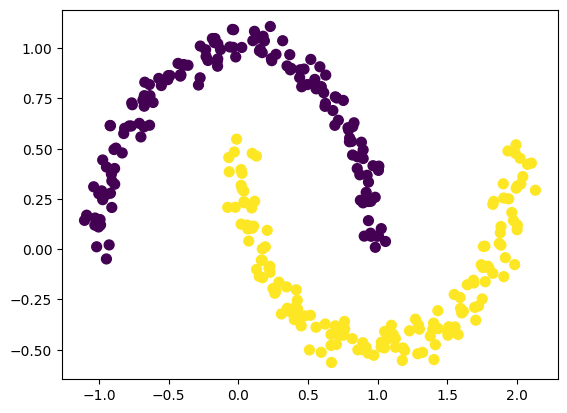

In [25]:
# Generate the "two moons" dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

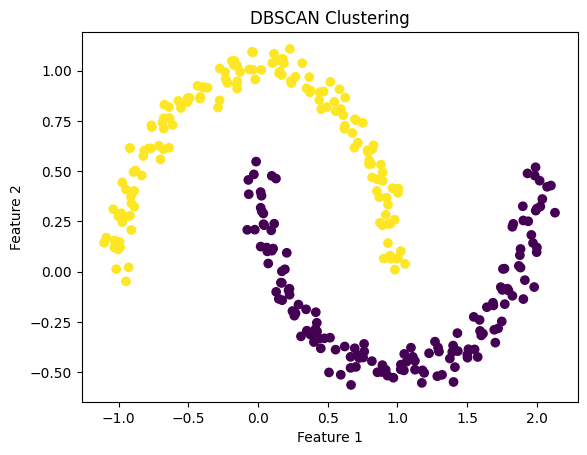

In [26]:
# Apply the DBSCAN algorithm
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


## Difference between K-means and DBSCAN

The main differences between [k-means](./Kmeans.ipynb) and DBSCAN are:

- K-means requires the number of clusters as an input parameter, while DBSCAN does not.
- K-means is sensitive to the initial placement of centroids and may converge to local optima, while DBSCAN is more robust due to its density-based approach.
- K-means tends to work well with spherical clusters and may struggle with clusters of arbitrary shapes, while DBSCAN can find clusters of any shape.
- K-means is less robust to noise compared to DBSCAN, which can identify and separate noise points from clusters.
- DBSCAN can handle datasets with varying densities, while k-means assumes similar densities across clusters.

Here's a table to summarize the difference between DBSCAN and k-means clustering algorithms:

| Criterion            | DBSCAN                                          | k-means                                          |
|----------------------|-------------------------------------------------|--------------------------------------------------|
| Algorithm type       | Density-based clustering                        | Partition-based clustering                       |
| Cluster shapes       | Can handle clusters of arbitrary shapes         | Assumes spherical clusters                        |
| Number of clusters   | Automatically determined by the algorithm       | Must be specified in advance (hyperparameter)    |
| Noise handling       | Identifies and separates noise points           | No explicit noise handling; noise affects clusters|
| Cluster assignment   | Points can remain unassigned (noise)            | All points are assigned to a cluster             |
| Sensitivity to initialization | Not sensitive to initialization       | Sensitive to initial centroids selection         |
| Complexity           | $O(n \log n)$ with suitable index structure     | Typically $O(n \cdot k \cdot I \cdot t)$, where $n$: points, $k$: clusters, $I$: iterations, $t$: dimensions |

### Comparison of K-means and DBSCAN on different datasets
We will now compare the performance of k-means and DBSCAN on dataests with different distributions. Here we will use the moons and circles datasets from scikit-learn, which are suitable for DBSCAN since they are not convex and have varying densities. Please refer to the [k-means](./Kmeans.ipynb) notebook for a discussion on the types of data distributions that are more suited for k-means clustering than DBSCAN.


In [27]:
# Delete all previous variables
for _ in locals().copy():
    if _.startswith('__') or _.startswith('_'):
        continue
    del locals()[_]

In [28]:
# Import libraries
import numpy as np
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

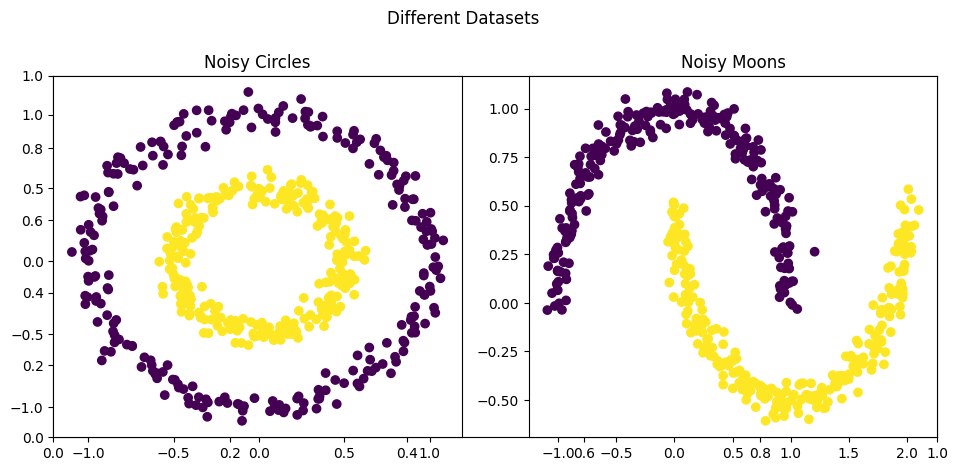

In [29]:
# Generate different datasets. 
n_samples = 500
random_state = 42

# Noisy circles
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=random_state)

# Noisy moons
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)


# Visualize the datasets

# Set figure size and title
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Different Datasets')

# Plot each dataset in a subplot
datasets = [
    ('Noisy Circles', noisy_circles),
    ('Noisy Moons', noisy_moons),
]

for i, (title, data) in enumerate(datasets, 1):
    X, y = data
    ax = fig.add_subplot(1, 2, i)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    ax.set_title(title)

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()



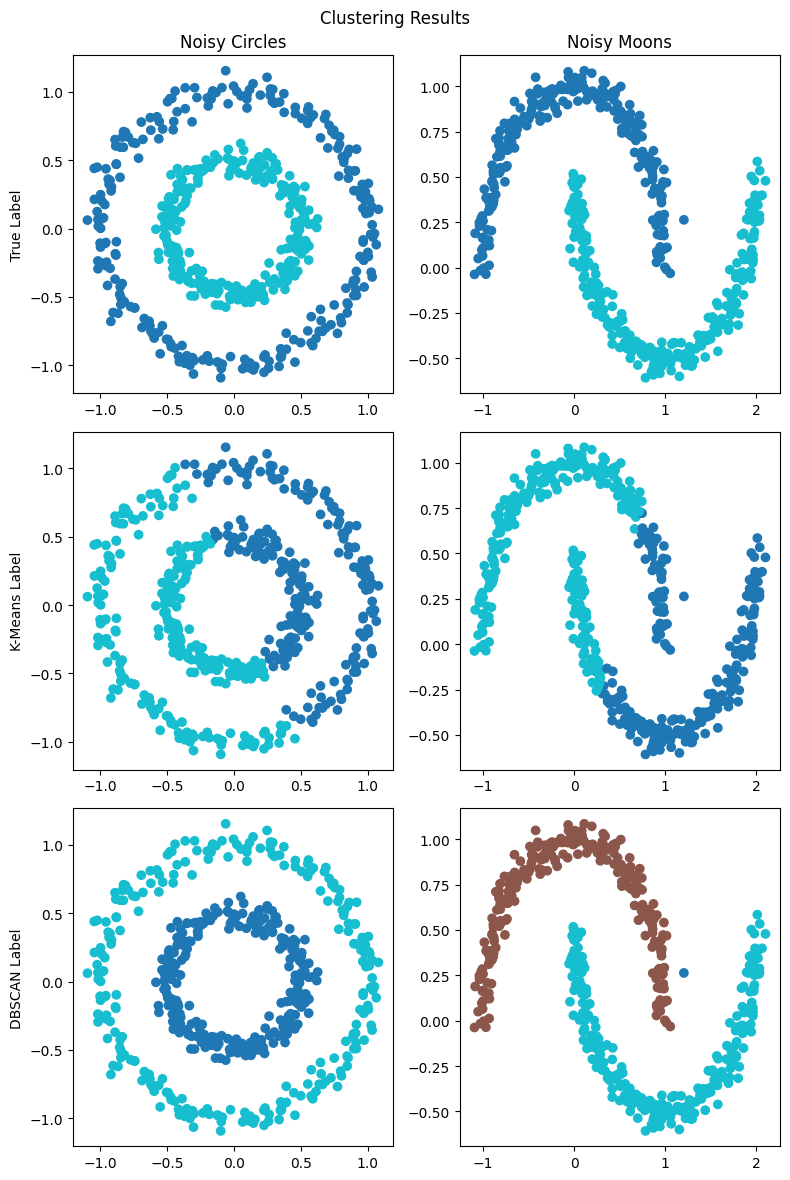

In [30]:
# There are some future warnings that we want to ignore for this exercise
import warnings
warnings.filterwarnings("ignore")

# k-means clustering
kmeans = KMeans(n_clusters=2, random_state=random_state)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.2)

# Fit the models and get the predicted labels
kmeans_labels = []
dbscan_labels = []

for _, data in datasets:
    X, y = data
    kmeans_labels.append(kmeans.fit_predict(X))
    dbscan_labels.append(dbscan.fit_predict(X))


# Visualize the datasets

# Set figure size and title
fig, axs = plt.subplots(3, 2, figsize=(8, 12))
fig.suptitle('Clustering Results')

# Plot true labels
for i, (title, data) in enumerate(datasets):
    X, y = data
    axs[0,i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10)
    axs[0,i].set_title(title)
    
# Plot k-means labels
for i, (title, data) in enumerate(datasets):
    X, y = data
    axs[1,i].scatter(X[:, 0], X[:, 1], c=kmeans_labels[i], cmap=plt.cm.tab10)
    
# Plot DBSCAN labels
for i, (title, data) in enumerate(datasets):
    X, y = data
    axs[2,i].scatter(X[:, 0], X[:, 1], c=dbscan_labels[i], cmap=plt.cm.tab10)

# Add row titles
axs[0,0].set_ylabel('True Label')
axs[1,0].set_ylabel('K-Means Label')
axs[2,0].set_ylabel('DBSCAN Label')

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

In the "noisy circles" and "noisy moons" datasets, K-means does not perform well because it assumes that the clusters are circular and have similar sizes, which is not the case in these datasets. On the other hand, DBSCAN is able to identify the clusters well, even though they are not circular, because it does not make any assumptions about the shape or size of the clusters. Therefore, DBSCAN is a more suitable algorithm for these datasets compared to K-means.



## Pros and Cons

**Pros:**
- Can find clusters of arbitrary shapes.
- Robust to noise.
- Does not require the number of clusters as an input parameter.
- Handles datasets with varying densities.
- Requires only two hyperparameters.

**Cons:**
- Not efficient with high-dimensional data.
- Sensitive to the choice of `eps` and `minPts` hyperparameters.
- Cannot handle clusters with different densities well.

## Suitable Tasks and Datasets

DBSCAN is a versatile clustering algorithm with a wide range of applications. It's particularly suitable for tasks and datasets with the following characteristics:

DBSCAN is a versatile clustering algorithm with a wide range of applications. It's particularly suitable for tasks and datasets with the following characteristics:

1. **Arbitrary Shaped Clusters**: Unlike K-means, DBSCAN can detect clusters of arbitrary shapes. This makes it suitable for tasks where the data points naturally form non-spherical clusters.
2. **Noise Handling**: DBSCAN is capable of detecting and marking noisy points that don’t belong to any cluster. This is particularly useful for tasks where the data contains outliers or irrelevant points.
3. **Density-Based Clusters**: DBSCAN is ideal for tasks where the clusters are defined based on the density of the data points, i.e., regions of the data space where there are high densities of data points separated by regions with low densities of data points.
4. **Unknown Number of Clusters**: Unlike K-means, with DBSCAN, you don't need to specify the number of clusters a priori. This makes DBSCAN suitable for datasets where the number of clusters is unknown.

DBSCAN has been effectively used in various applications including:

- **Anomaly Detection**: DBSCAN's ability to identify noise or outliers makes it an excellent choice for anomaly detection tasks.
- **Image Segmentation**: DBSCAN can segment different parts of an image based on the density of the pixels.
- **Spatial Data Analysis**: In spatial or geographical data, DBSCAN can identify areas of high density, like urban areas or areas of forest.
- **Pattern Recognition**: DBSCAN can identify and group similar patterns in a dataset, making it useful for tasks like handwriting recognition or gene sequence analysis.

Please note that DBSCAN might not perform well with high-dimensional data, as the concept of "density" becomes less meaningful in high-dimensional spaces (a phenomenon sometimes referred to as the "curse of dimensionality").

## References

1. Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In kdd (Vol. 96, No. 34, pp. 226-231).
2. Scikit-Learn: Density-Based Spatial Clustering of Applications with Noise (DBSCAN) - https://scikit-learn.org/stable/modules/clustering.html#dbscan
3. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".